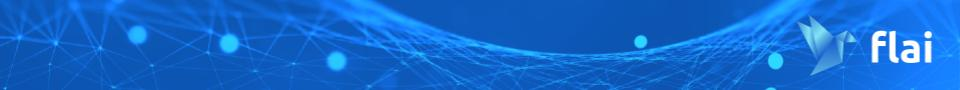

# **Aula 6 - Combinação de Modelos**

---
## **Importação e Preparação dos Dados**

In [11]:
# importação via github 
import pandas as pd
url = 'https://raw.githubusercontent.com/gitflai/DDS4/main/insurance.csv'
dados = pd.read_csv(url)

# mise un place
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = dados['charges']/1000 
dados = dados[['bmi', 'smoker', 'charges']]
dados.head()

# separação de variáveis preditoras e variával resposta
X = dados[['bmi', 'charges']]
y = dados['smoker'] 

---
## **Upgrade na Técnica de Validação: _K-FOLD REPETIDO_**

In [12]:
# Configuração da Validação Cruzada

from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold

validacao = RepeatedKFold(n_splits = 10, n_repeats = 3)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 

In [14]:
# Regressão Logística

modelo = LogisticRegression() 
medidas = cross_validate(modelo, X, y, cv = validacao, scoring = 'accuracy')
round(medidas['test_score'].mean(), 4)

0.9322

In [15]:
medidas

{'fit_time': array([0.01161695, 0.01073647, 0.00978231, 0.01065898, 0.00958371,
        0.00943589, 0.00939393, 0.01175642, 0.01001644, 0.00954652,
        0.01132298, 0.00958061, 0.00976133, 0.00944924, 0.00913668,
        0.00939941, 0.00958562, 0.00949955, 0.00968266, 0.00937605,
        0.01489592, 0.00942636, 0.00970697, 0.00943303, 0.00946331,
        0.01008391, 0.00969982, 0.0100143 , 0.01008487, 0.00976062]),
 'score_time': array([0.0015285 , 0.00166607, 0.00207734, 0.00144219, 0.00146317,
        0.00143981, 0.00139403, 0.00222015, 0.00142884, 0.00146389,
        0.00150108, 0.00147176, 0.00152206, 0.00145006, 0.00139642,
        0.00140715, 0.00144911, 0.00147057, 0.00149655, 0.00142741,
        0.00153756, 0.00164533, 0.00149155, 0.00148416, 0.00146413,
        0.00156307, 0.00153971, 0.00147676, 0.00145555, 0.00143552]),
 'test_score': array([0.95522388, 0.91044776, 0.97761194, 0.92537313, 0.93283582,
        0.94029851, 0.8880597 , 0.96268657, 0.87969925, 0.94736842,
    

In [16]:
# KNN

modelo = KNeighborsClassifier(n_neighbors = 25) 
medidas = cross_validate(modelo, X, y, cv = validacao, scoring = 'accuracy')
round(medidas['test_score'].mean(), 4)

0.9611

In [22]:
# Árvore de Decisão

modelo = DecisionTreeClassifier(max_depth = 3) 
medidas = cross_validate(modelo, X, y, cv = validacao, scoring = 'accuracy')
round(medidas['test_score'].mean(), 4)

0.9624

In [23]:
# Modelos de Classificação com 'Probabilidade'
# interpretar como propensão à classificação

modelo = LogisticRegression()
modelo.fit(X,y) 
modelo.predict_proba(X).round(4).tolist()

[[0.8241, 0.1759],
 [0.9997, 0.0003],
 [0.999, 0.001],
 [0.175, 0.825],
 [0.9975, 0.0025],
 [0.9941, 0.0059],
 [0.9972, 0.0028],
 [0.9897, 0.0103],
 [0.9956, 0.0044],
 [0.0533, 0.9467],
 [0.9963, 0.0037],
 [0.0836, 0.9164],
 [0.9997, 0.0003],
 [0.9988, 0.0012],
 [0.1568, 0.8432],
 [0.9956, 0.0044],
 [0.9866, 0.0134],
 [0.9934, 0.0066],
 [0.9991, 0.0009],
 [0.0614, 0.9386],
 [0.9933, 0.0067],
 [0.999, 0.001],
 [0.9998, 0.0002],
 [0.0187, 0.9813],
 [0.9932, 0.0068],
 [0.9178, 0.0822],
 [0.723, 0.277],
 [0.9878, 0.0122],
 [0.9557, 0.0443],
 [0.0455, 0.9545],
 [0.0959, 0.9041],
 [0.9969, 0.0031],
 [0.9964, 0.0036],
 [0.9342, 0.0658],
 [0.0009, 0.9991],
 [0.9866, 0.0134],
 [0.9671, 0.0329],
 [0.9851, 0.0149],
 [0.0364, 0.9636],
 [0.0064, 0.9936],
 [0.9963, 0.0037],
 [0.9996, 0.0004],
 [0.9608, 0.0392],
 [0.9968, 0.0032],
 [0.9995, 0.0005],
 [0.9529, 0.0471],
 [0.9999, 0.0001],
 [0.9996, 0.0004],
 [0.8753, 0.1247],
 [0.0338, 0.9662],
 [0.9998, 0.0002],
 [0.9994, 0.0006],
 [0.3638, 0.6362],
 

---
## **Combinação de Modelos HARD**

In [30]:
# Combinação por votos 'Hard'

from sklearn.ensemble import VotingClassifier
 
reglog = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors = 25)
arvore = DecisionTreeClassifier(max_depth = 3) 

modelos = [('Reg. Log.', reglog), 
           ('KNN', knn), 
           ('Árvore', arvore)]

modelo = VotingClassifier(modelos, voting = 'hard')

medidas = cross_validate(modelo, X, y, cv = validacao, scoring = 'accuracy')

round(medidas['test_score'].mean(), 4)

0.9631

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names

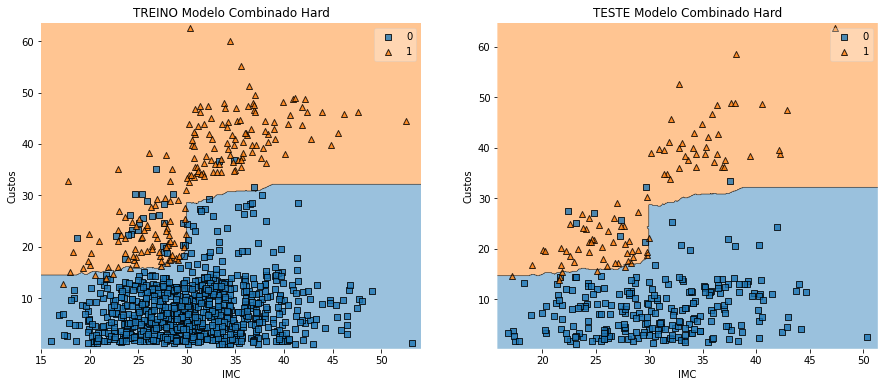

In [31]:
# Região de Decisão

from sklearn.model_selection import train_test_split 
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
  
Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
modelo.fit(Xtreino, ytreino)

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plot_decision_regions(Xtreino.values, ytreino.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TREINO Modelo Combinado Hard')  

plt.subplot(1, 2, 2)
plot_decision_regions(Xteste.values, yteste.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TESTE Modelo Combinado Hard')   

plt.show()

---
## **Combinação de Modelos SOFT**

In [38]:
# Combinação por votos 'Soft'

from sklearn.ensemble import VotingClassifier
 
reglog = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors = 25) 
arvore = DecisionTreeClassifier(max_depth = 3) 

modelos = [('Reg. Log.', reglog), ('KNN', knn), ('Árvore', arvore)]

modelo = VotingClassifier(modelos, voting = 'soft')

medidas = cross_validate(modelo, X, y, cv = validacao, scoring = 'accuracy')

round(medidas['test_score'].mean(), 4)

0.9654

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names

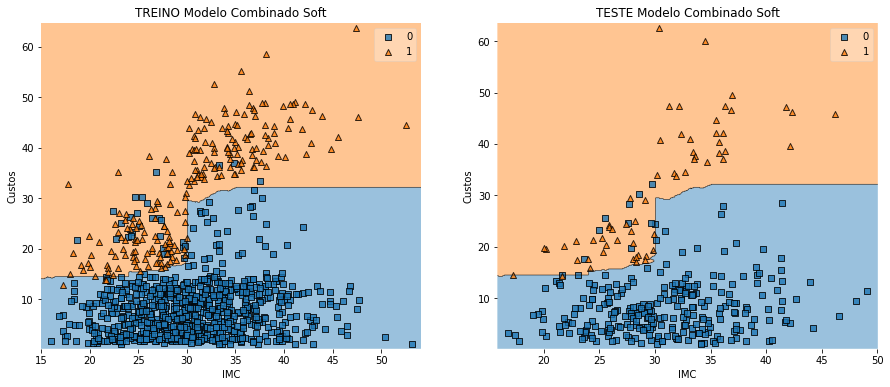

In [39]:
# Região de Decisão

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
modelo.fit(Xtreino, ytreino)

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plot_decision_regions(Xtreino.values, ytreino.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TREINO Modelo Combinado Soft')  

plt.subplot(1, 2, 2)
plot_decision_regions(Xteste.values, yteste.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TESTE Modelo Combinado Soft')   

plt.show()

---
# **Exercício Proposto**

# Investique mais possibilidades de combinações de modelos com o objetivo de encontrar uma configuração que melhore os resultados encontrados até então nesse conjunto de dados. 

---
**_#itstimetoflai_** 